 ## RECUENTO DE MANZANAS EN IMÁGENES

**Miren Ostolaza y María García Spínola**

El objetivo de nuestra Práctica 2 de imágenes es contabilizar el número de manzanas presentes en una imagen, para ello probamos diferentes métodos, en los cuáles vamos ajustando los parámetros, hasta conseguir el método que mejor realice la función que queremos.

En un primer intento se prueba a realizar el recuento de manzanas con el método Canny identificando los bordes externos

In [1]:
#pip install opencv-python numpy matplotlib

In [3]:
import cv2
import numpy as np
import time
import sys
import os
from PIL import  Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

El proceso se divide en 5 fases:

- Convertir la imagen a escala de grises
- Filtrar la imagen para eliminar el ruido
- Aplicar el detector de bordes Canny
- Buscar los contornos dentro de los bordes detectados
- Dibujar dichos contornos

*El resultado de una fase será el input de la siguiente*

Inicialmente, se prueba con una imagen de monedas que parece ser más sencilla de identificar sus bordes:

In [6]:
#Leemos la imagen con cv2:
input_imagen = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/coin.jpeg', cv2.IMREAD_GRAYSCALE)

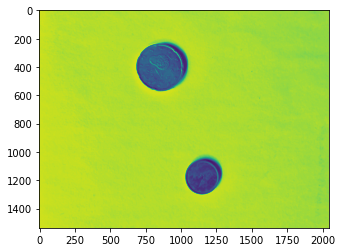

In [7]:
#Imprimir imagen por pantalla:
plt.imshow(input_imagen)

In [8]:
#Se transforma la imagen a escala de grises:
imagen_gris = cv2.cvtColor(input_imagen, cv2.IMREAD_GRAYSCALE)

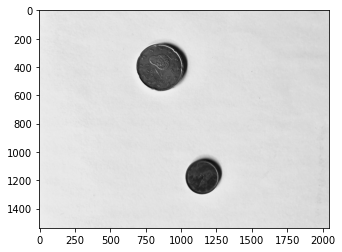

In [9]:
plt.imshow(imagen_gris)

In [16]:
# Aplicar suavizado Gaussiano para eliminar ruido con kernel de 5x5
# el tamaño de kernel influye en el suavizado, mayor kernel más suave, 
# menor kernel, más ruido
gaussiana = cv2.GaussianBlur(imagen_gris, (5,5), 30)

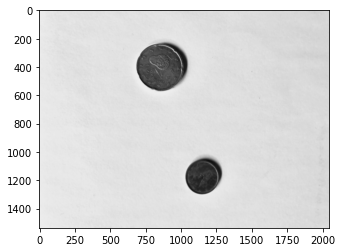

In [17]:
plt.imshow(gaussiana)

In [18]:
# Se detectan los bordes con método Canny

threshold1 = 100
threshold2 = 200
canny = cv2.Canny(gaussiana, threshold1, threshold2)

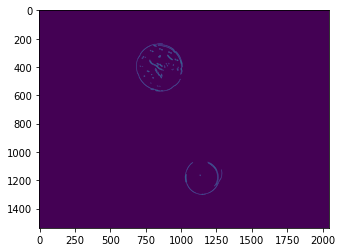

In [19]:
plt.imshow(canny)

In [21]:
# Se buscan los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Con el método cv2.findContours() se detectan los contornos. Solo detectaremos los externos (cv2.RETR_EXTERNAL) 
#y se hará una aproximación para eliminar los píxeles del contorno redundantes (cv2.CHAIN_APPROX_SIMPLE)

In [22]:
# Se muestra el número de contornos
print("He encontrado {} monedas".format(len(contornos)))

He encontrado 87 monedas


Claramente este método tiene que mejorarse bastante porque solo hay 2 monedas y ha detectado 87.

In [23]:
#PROBAMOS CON MANZANAS
#Leemos la imagen con cv2:
input_imagen2 = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/AppleA/Apple 202.png', cv2.IMREAD_GRAYSCALE)

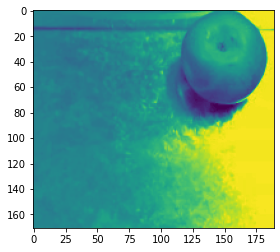

In [24]:
#Imprimir imagen por pantalla
plt.imshow(input_imagen2)

In [25]:
#Se transforma la imagen a escala de grises:
imagen_gris2 = cv2.cvtColor(input_imagen2, cv2.IMREAD_GRAYSCALE)

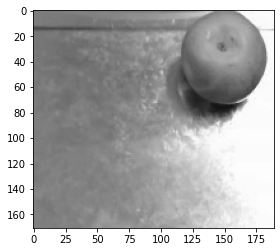

In [26]:
plt.imshow(imagen_gris2)

In [27]:
# Aplicar suavizado Gaussiano para eliminar ruido con kernel de 5x5
gaussiana2 = cv2.GaussianBlur(imagen_gris2, (5,5), 10)

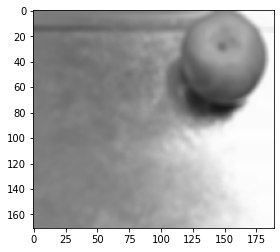

In [28]:
plt.imshow(gaussiana2)

In [38]:
# Se detectan los bordes con método Canny

threshold1 = 100
threshold2 = 200
canny2 = cv2.Canny(gaussiana2, threshold1, threshold2)

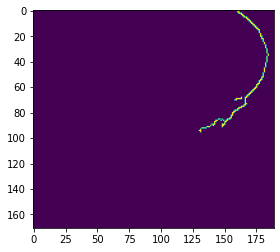

In [39]:
plt.imshow(canny2)

In [40]:
# Se buscan los contornos
(contornos,_) = cv2.findContours(canny2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
# Se muestra el número de contornos
print("He encontrado {} manzanas".format(len(contornos)))

He encontrado 2 manzanas


Ha encontrado dos manzanas, además, en la imagen 'canny2' observamos que el borde no es para nada el de la manzana.

Parece que este método no es idóneo porque identifica muchos bordes, incluso cuando la imagen está muy ajustada a la manzana, por lo que se decide probar otros métodos, también relacionados con la detección de bordes:

In [42]:
#pip install imutils

In [43]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [57]:
image = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/imagenes/coin.jpeg')

In [58]:
#image

In [59]:
#añadimos suavizado a la imagen con otro método de la librería cv2
image_blur = cv2.medianBlur(image,41)

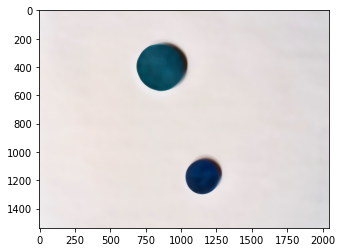

In [60]:
plt.imshow(image_blur)

In [61]:
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

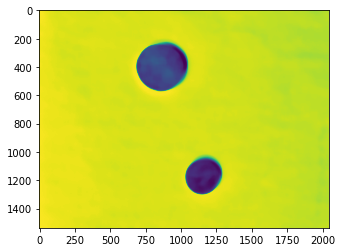

In [62]:
plt.imshow(image_blur_gray)

In [63]:
image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)

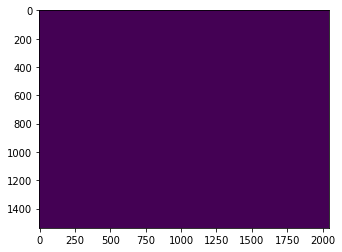

In [64]:
plt.imshow(image_thresh)

In [65]:
kernel = np.ones((3,3),np.uint8)

In [66]:
opening = cv2.morphologyEx(image_blur_gray,cv2.MORPH_OPEN,kernel) 

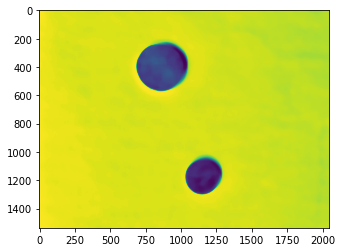

In [67]:
plt.imshow(opening)

In [68]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

In [69]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


In [71]:
#cnts

In [72]:
cnts = imutils.grab_contours(cnts)

Función para mostrar la imagen original, la imagen con los contornos y el recuento, en este caso de monedas:

In [75]:
def display(img,count,cmap="gray"):
    f_image = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/imagenes/coin.jpeg')
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Número Total de Monedas = {}".format(count))

In [76]:
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

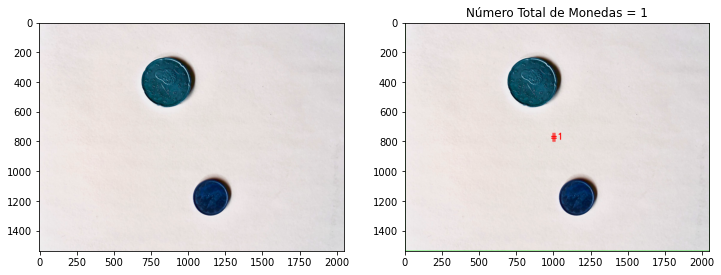

In [77]:
display(image,len(cnts))

Continúa siendo un método fallido porque no identifica bien los bordes ni el recuento.

Probamos a dilatar los bordes, es decir, hacerlos más gruesos para que no detecte tan en detalle todos los bordes, sino el objeto en general:

In [78]:
image = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/imagenes/coin.jpeg')

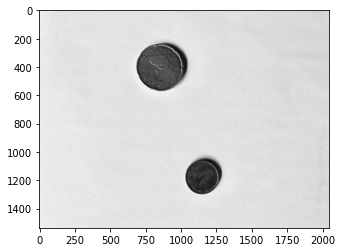

In [79]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

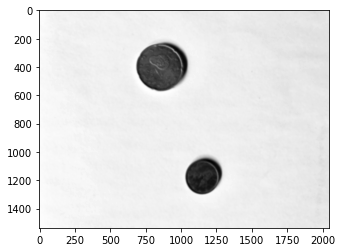

In [80]:
blur = cv2.GaussianBlur(gray, (21,21), 0) #mientras mayor sea la ventana del kernel, mas borrorsa la imagen
plt.imshow(blur, cmap='gray')

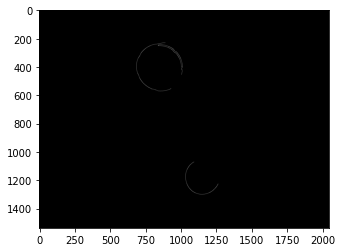

In [81]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

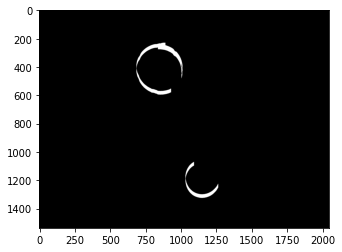

In [88]:
dilated = cv2.dilate(canny, (1,1), iterations=25) 
#el nº de iteraciones influye en el grosor de los bordes
plt.imshow(dilated, cmap='gray')

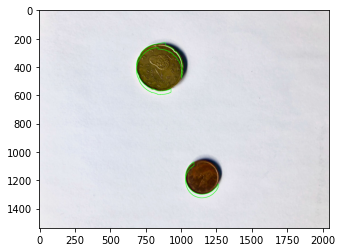

In [89]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)

plt.imshow(rgb)

In [90]:
print('Coins in the image: ', len(cnt))

Coins in the image:  2


Parece que esta vez lo ha hecho bastante mejor, detecta los bordes y por tanto se puede contar el número de monedas correcto

Probamos ahora con manzanas:

In [94]:
image = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/imagenes/Fruit2.png')

In [96]:
#plt.imshow(image)

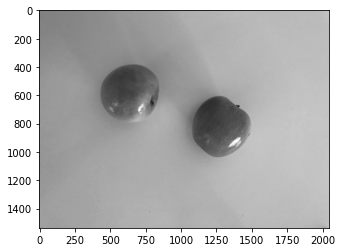

In [97]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

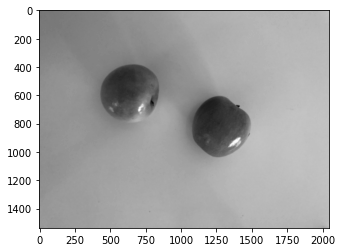

In [101]:
blur = cv2.GaussianBlur(gray, (11,11), 0) #mientras mayor sea la ventana del kernel, mas borrorsa la imagen
plt.imshow(blur, cmap='gray')

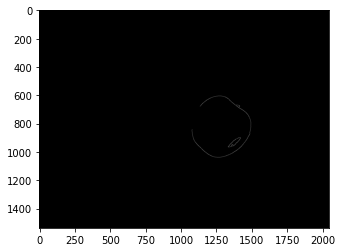

In [102]:
canny = cv2.Canny(blur, 30, 200)
plt.imshow(canny, cmap='gray')

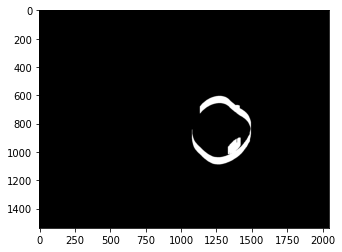

In [103]:
dilated = cv2.dilate(canny, (501,501), iterations=50)
plt.imshow(dilated, cmap='gray')

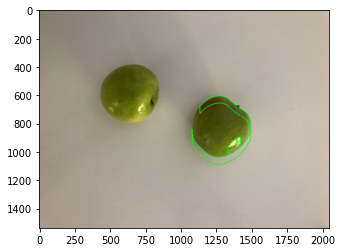

In [104]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),3)

plt.imshow(rgb)

In [106]:
print('Manzanas presentes en la imagen: ', len(cnt))

Manzanas presentes en la imagen:  1


No lo ha hecho del todo mal con manzanas pero no ha identificado las dos.

Otra forma que se nos ocurre de encontrar objetos iguales es haciendo un matching de una imagen de entrada que contenga solo una muestra del objeto (**template**) y encontrar ese objeto en otra imagen donde incluso haya más de uno, mediante búsqueda de patrones en los pixeles con cv2.

In [107]:
def points_template_matching(image, template):
    points = []
    threshold = 0.86 #se puede ir cambiando este parámetro
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    candidates = np.where(res >= threshold)
    candidates = np.column_stack([candidates[1], candidates[0]])
    i = 0
    while len(candidates) > 0:
        if i == 0: points.append(candidates[0])
        else:
            to_delete = []
            for j in range(0, len(candidates)):
                diff = points[i-1] - candidates[j]
                if abs(diff[0]) < 45 and abs(diff[1]) < 45:
                    to_delete.append(j)
            candidates = np.delete(candidates, to_delete, axis=0)
            if len(candidates) == 0: break
            points.append(candidates[0])
        i += 1
    return points

In [112]:
image1 = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/Coins/coins3.jpeg')
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/Coins/coin.jpeg',0)
points1 = points_template_matching(image_gray1, template1)
#print("points1 = ",points1)

In [110]:
if len(points1) > 0:
    points = points1
elif len(points1) == 0:
    points = []

In [113]:
for point in points:
    x1, y1 = point[0], point[1]
    x2, y2 = point[0] + template1.shape[1], point[1] + template1.shape[0]
    cv2.rectangle(image1, (x1, y1), (x2, y2), (0, 255, 0), 2)

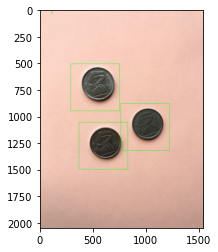

In [114]:
cv2.putText(image1, str(len(points)), (95, 35), 1, 3, (0, 255, 0), 2)
plt.imshow(image1)


In [116]:
print("Se detectan {} monedas.".format(len(points1)))

Se detectan 3 manzanas.


Probamos con otra imagen:

In [117]:
def points_template_matching2(image, template):
    points = []
    threshold = 0.80
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    candidates = np.where(res >= threshold)
    candidates = np.column_stack([candidates[1], candidates[0]])
    i = 0
    while len(candidates) > 0:
        if i == 0: points.append(candidates[0])
        else:
            to_delete = []
            for j in range(0, len(candidates)):
                diff = points[i-1] - candidates[j]
                if abs(diff[0]) < 60 and abs(diff[1]) < 60:
                    to_delete.append(j)
            candidates = np.delete(candidates, to_delete, axis=0)
            if len(candidates) == 0: break
            points.append(candidates[0])
        i += 1
    return points

In [121]:
image2 = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/Coins/coins2.jpeg')
image_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
template2 = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/Coins/coin.jpeg',0)
points2 = points_template_matching2(image_gray2, template2)


In [122]:
if len(points2) > 0:
    points = points2
elif len(points2) == 0:
    points = []

In [123]:
for point in points:
    x1, y1 = point[0], point[1]
    x2, y2 = point[0] + template2.shape[1], point[1] + template2.shape[0]
    cv2.rectangle(image2, (x1, y1), (x2, y2), (0, 255, 0), 2)

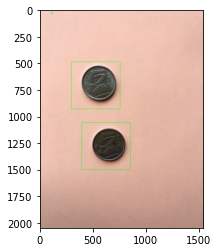

In [124]:
cv2.putText(image2, str(len(points)), (95, 35), 1, 3, (0, 255, 0), 2)
plt.imshow(image2)

In [126]:
print("Se detectan {} monedas.".format(len(points2)))

Se detectan 2 manzanas.


Se ha tenido que cambiar los parámetros de la función a points_template_matching2 (threshold y pixeles) y se prueba con la 
primera imagen para asegurar que sigue saliendo bien, y así es, contabiliza 2 monedas.

**Problema de este método:**
Las manzanas pueden ser muy diferentes por lo tanto no es apropiado buscar patrones porque no contabilizaría las manzanas que difirieran del template. 

Es un buen método pero para otro caso de uso en el que todos los objetos son exactamente iguales, quizás más en imágenes o dibujos digitales que en fotos de la realidad.

## YOLO

Por último, probamos el método YOLO (You Only Look Once), un algoritmo de Deep Learning para la detección de objetos.

La clasificación de modelos consiste en identificar unicamente los objetos más característicos de la imagen recibida y localizarlos. La detección de objetos combina estos dos métodos de manera que el modelo es capaz de localizar los objetos que aparecen en la imagen y asiganarles la etiqueta de la clase a la que pertenecen.

En este caso, se empleará un modelo pre-entrenado de la página de TensorFlow oficial, dichos modelos están basados en tensorflow y pueden cargarse mediante la librería de opencv. En este caso el modelo utilizado es MobileNet-SSD versión 3. 

In [4]:
conf_file = 'C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/yolo/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/yolo/frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, conf_file)

In [6]:
#Se necesitarán además las etiquetas de las clases correpondientes que incluye el modelo, para poder relacionar 
#cada objeto con la clase a la que pertenece, para ello se carga el txt Labels con dichas etiquetas.
classLabels = []
file = 'C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/yolo/Labels.txt'
with open(file, 'rt') as f:
    classLabels = f.read().rstrip('\n').split('\n')

In [7]:
#Teniendo en cuenta el archivo de configuración inizializamos los siguientes parámetros para que encajen con el modelo pre-entrenado.
model.setInputSize(320,320) 
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000139F91B50D0>

In [8]:
#Leemos la primera imagen que contiene una única manza para ver si el modelo es capaz de detctarla
imagen = cv2.imread('C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/imagenes/Apple.png')

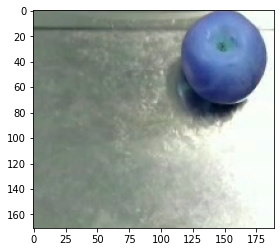

In [9]:
plt.imshow(imagen)

Para ejecutar el modelo debemos definir el umbral. Se tiene en cuenta que este valor oscila entre 0 y 1, cuanto más se acerca al 1, mayor será la exactitud de detección, pero también es menor el número de objetos detectados.

Fijamos en un 70% el thresold y observamos lo que nos devuelve el modelo.



In [10]:

ClassIndex, confidence, bbox =model.detect(imagen, confThreshold = 0.7) 

In [11]:
print(ClassIndex) #el índice de las clases a las que pertenecen los objetos que se encuentren en la imagen, indexando el fihero de etiquetas que hemos introducido previamente
print(confidence) #el nivel de confianza con la que se ha clasificado en esa clase
print(bbox) #la ubicación exacta de la caja

[[53]]
[[0.7640722]]
[[114   0  69  81]]


Se confirma que ha podido detectar el objeto de la imagen.

In [12]:
#Para visualizarlo sobre la imagen
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(imagen,boxes,(255,0,0),2)
    cv2.putText(imagen,classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+60),font, fontScale = font_scale, color=(0,255,0), thickness=2)

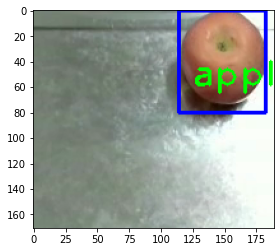

In [13]:
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

Se comprueba ahora que el modelo es capaz de identificar más de un objeto en la misma imagen. 

In [25]:
#Cargamos una imagen con más de una manzana
img = cv2.imread("C:/Users/Maria/Documents/MBD/AnalisisDatosNoEstructurados/PracticaImagenes/imagenes/Apples.png")

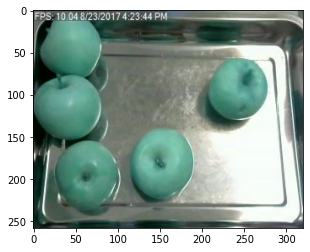

In [26]:
plt.imshow(img) 

In [27]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.7)


In [28]:
print(ClassIndex)
print(confidence)
print(bbox)

[[53]
 [53]]
[[0.76244223]
 [0.73493165]]
[[112 139  80  91]
 [ 22 154  79  87]]


Se puede observar que solamente ha identificado un objeto por lo que se modificará el valor del umbral

In [29]:
#cambiamos el umbral para que el modelo sea capaz de detectar todos los objetos

ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [30]:
print(ClassIndex)
print(confidence)
print(bbox)


[[53]
 [53]
 [53]
 [53]
 [53]]
[[0.76244223]
 [0.73493165]
 [0.66919357]
 [0.5938344 ]
 [0.56294745]]
[[112 139  80  91]
 [ 22 154  79  87]
 [205  59  74  74]
 [  2  77  83  79]
 [  6  10  79  81]]


Esta vez ha conseguido detectar los cuatro objetos de la imagen.

In [31]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0) ,2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+5, boxes[1]+20), font, fontScale=font_scale,color=(0,255,0), thickness=2)

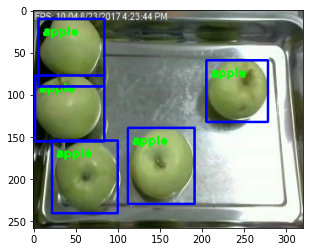

In [32]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [33]:
#Para conocer la cantidad de objetos que se detectan con el modelo en esta imagen.
print("Se han detectado {} manzanas".format(len(ClassIndex)))

Se han detectado 5 manzanas


Se puede ver que ha podido localizar todos los objetos de la imagen y ha sdo capaz de identificar la clase a la que pertenecen. Por tanto, se concluye que este método es el más apropiado para contabilizar manzanas en imágenes, además podría detectar otro tipo de frutas e incluso imágenes que contengan varios tipos, entrenado el modelo con esas clases previamente.